In [206]:
import pandas as pd
import numpy as np
import seaborn as sns

In [207]:
data = pd.read_html(
    'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8',
    match="Коефіцієнт народжуваності в регіонах України",
    thousands='.')[0]
data.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,"23,0","20,6","16,0","13,0","7,3","12,6",—,—
1,Вінницька,"22,4","19,2","14,2","12,4","8,4","11,2","10,9","7,6"
2,Волинська,"24,7","25,0","17,9","15,3","11,2","14,8","14,1","10,1"
3,Дніпропетровська,"20,4","20,4","15,1","12,3","7,1","11,2","11,1","7,1"
4,Донецька,"27,1","21,4","14,0","10,9","6,1","9,8","8,2",—


In [208]:
data.shape

(28, 9)

In [209]:
data.replace('—', np.nan, inplace=True)
data.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,"23,0","20,6","16,0","13,0","7,3","12,6",NaN,NaN
1,Вінницька,"22,4","19,2","14,2","12,4","8,4","11,2","10,9","7,6"
2,Волинська,"24,7","25,0","17,9","15,3","11,2","14,8","14,1","10,1"
3,Дніпропетровська,"20,4","20,4","15,1","12,3","7,1","11,2","11,1","7,1"
4,Донецька,"27,1","21,4","14,0","10,9","6,1","9,8","8,2",NaN


In [210]:
data.dtypes

Регіон    object
1950      object
1960      object
1970      object
1990      object
2000      object
2012      object
2014      object
2019      object
dtype: object

In [211]:
for col in data.columns:
    print(f"{col} - {data[col].isnull().sum()}")

Регіон - 0
1950 - 2
1960 - 1
1970 - 1
1990 - 0
2000 - 0
2012 - 0
2014 - 2
2019 - 4


In [212]:
def commaToDot(val: str):
    return val.replace(',', '.') if isinstance(val, str) else val

for col in data.columns:
    if col != 'Регіон':
        data[col]=data[col].apply(commaToDot)
        data[col]=data[col].apply(float)

data.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

In [213]:
data = data[:-1]
data.tail()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
22,Черкаська,20.5,17.9,14.4,12.3,7.5,10.0,9.8,6.4
23,Чернівецька,24.7,21.8,17.0,14.8,10.1,12.8,12.9,9.2
24,Чернігівська,22.0,18.3,12.7,10.8,6.9,9.4,9.0,6.1
25,Київ,NaN,17.4,15.9,12.0,7.3,12.0,12.1,11.0
26,Севастополь,NaN,NaN,NaN,12.5,7.0,12.0,NaN,NaN


In [214]:
data.fillna(data.mean(numeric_only=True), inplace=True)
data

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.000,20.600000,16.0,13.0,7.3,12.6,11.144,8.017391
1,Вінницька,22.400,19.200000,14.2,12.4,8.4,11.2,10.900,7.600000
2,Волинська,24.700,25.000000,17.9,15.3,11.2,14.8,14.100,10.100000
3,Дніпропетровська,20.400,20.400000,15.1,12.3,7.1,11.2,11.100,7.100000
4,Донецька,27.100,21.400000,14.0,10.9,6.1,9.8,8.200,8.017391
5,Житомирська,26.100,22.300000,15.9,12.9,8.9,12.2,12.000,7.900000
6,Закарпатська,31.400,27.300000,20.7,16.8,11.5,15.1,14.600,10.400000
7,Запорізька,21.900,19.700000,15.0,12.4,7.1,10.6,10.600,6.800000
8,Івано-Франківська,24.300,24.800000,18.2,15.5,10.3,12.4,12.200,8.800000
9,Київська,20.400,18.900000,15.6,12.3,7.3,12.2,12.100,8.000000


In [215]:
data[data['2019']>data['2019'].mean()]['Регіон']

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object

In [216]:
max_koef = data["2014"].max()
res = data[data["2014"] == max_koef]["Регіон"]
res

16    Рівненська
Name: Регіон, dtype: object

<Axes: xlabel='2019', ylabel='Регіон'>

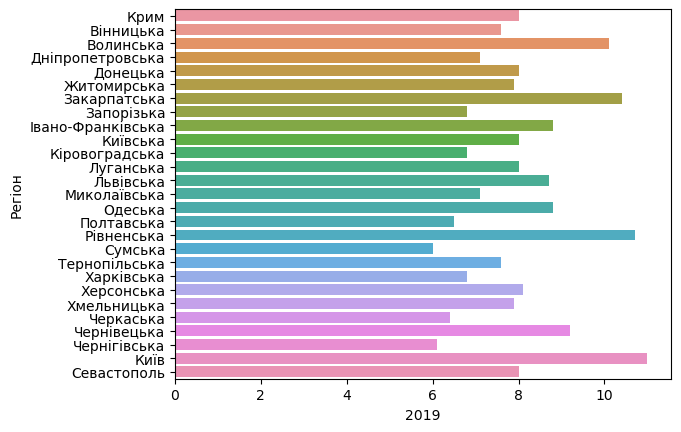

In [217]:
sns.barplot(data,y="Регіон", x="2019")